<a href="https://colab.research.google.com/github/pallavi4114/CODSOFT-Customer_churn_prediction/blob/main/CODSOFT_Task4_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv('Churn_Modelling.csv')

In [2]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

In [4]:
#plot Gender ratio bar graph
import plotly.express as px
df=px.histogram(data, x='Gender', color='Exited', marginal='box', color_discrete_sequence=['red','grey'])
df.update_layout(bargap=0.2)
df.show()

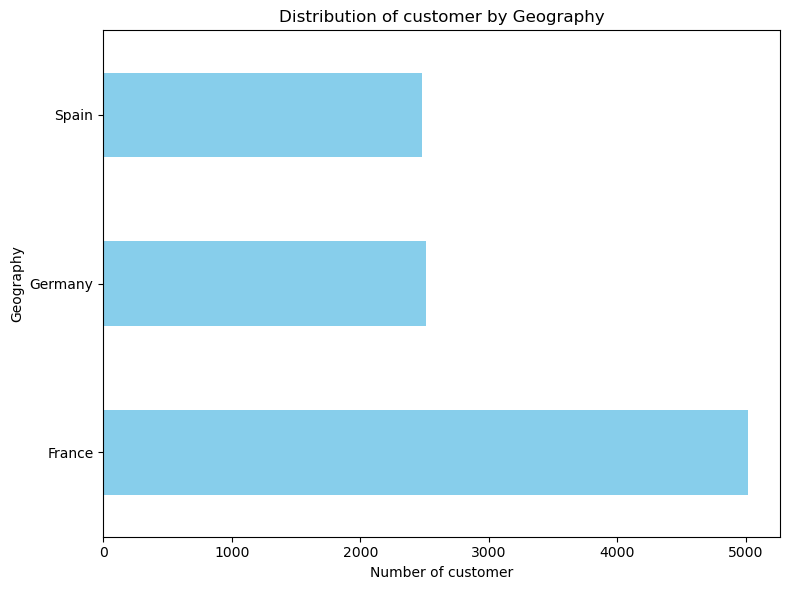

In [ ]:
#counts the number of customer in each geography
import matplotlib.pyplot as plt
geo_counts = data['Geography'].value_counts()
plt.figure(figsize=(8,6))
geo_counts.plot(kind='barh',color='skyblue')
plt.title('Distribution of customer by Geography')
plt.xlabel('Number of customer')
plt.ylabel('Geography')
plt.tight_layout()
plt.show()

Data Cleaning

In [ ]:
#Drop unuseful columns
columns_to_drop=['RowNumber',	'CustomerId',	'Surname', 'Geography']
data.drop(columns = columns_to_drop, inplace=True)

In [ ]:
data.tail()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
data.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#convert cetagorial data into numeric
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [ ]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


Data Visualization

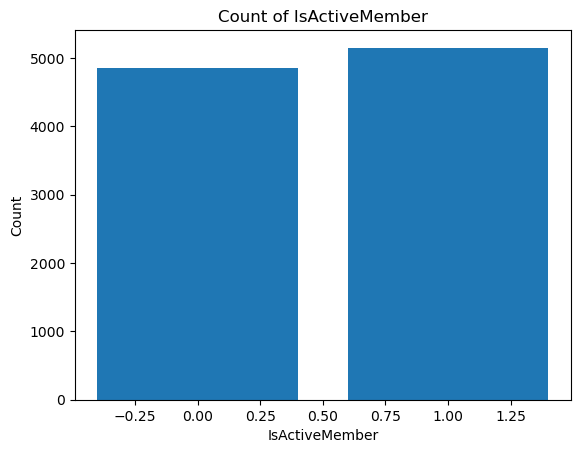

In [ ]:
#plot bar graph
member_counts = data['IsActiveMember'].value_counts()


plt.bar(member_counts.index, member_counts.values)
plt.xlabel('IsActiveMember')
plt.ylabel('Count')
plt.title('Count of IsActiveMember')
plt.show()

Text(0.5, 1.0, 'Scatter plot of Age vs Credit Score')

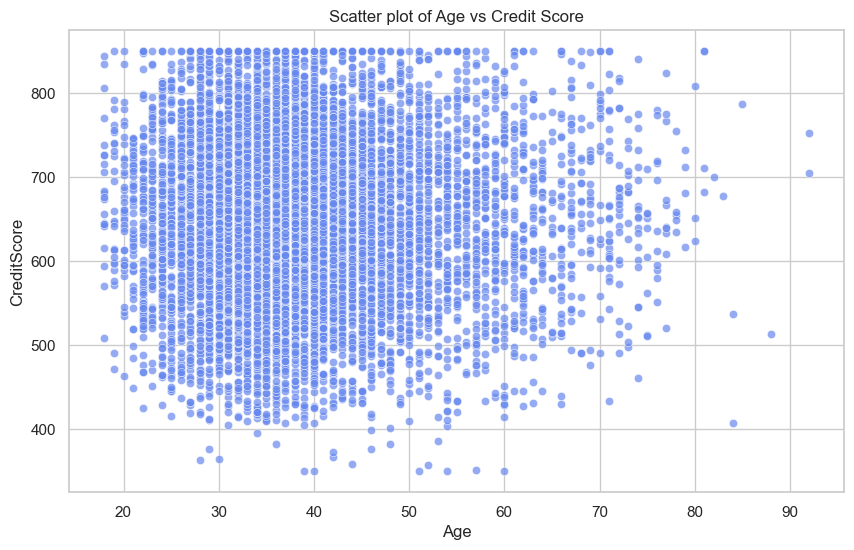

In [ ]:
#plot scatter graph
import seaborn as sns

age =data['Age']
credit_score = data['CreditScore']

sns.set(style = 'whitegrid')
sns.set_palette('coolwarm')

plt.figure(figsize=(10, 6) )
sns.scatterplot(x=age, y=credit_score, alpha=0.7)

plt.xlabel('Age')
plt.ylabel('CreditScore')
plt.title('Scatter plot of Age vs Credit Score')

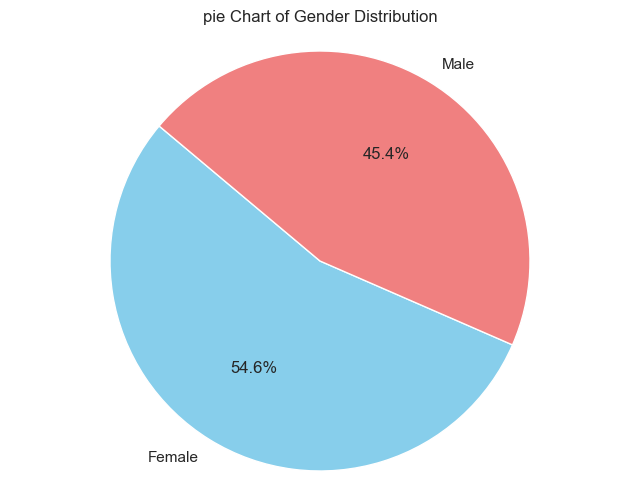

In [ ]:
#plot pie chart
gender_counts = data['Gender'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(gender_counts,labels=['Female','Male'],autopct = '%1.1f%%',startangle = 140, colors=["skyblue","Lightcoral"])
plt.title("pie Chart of Gender Distribution")
plt.axis('equal')
plt.show()

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>],
       [<Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>],
       [<Axes: title={'center': 'Exited'}>, <Axes: >, <Axes: >]],
      dtype=object)

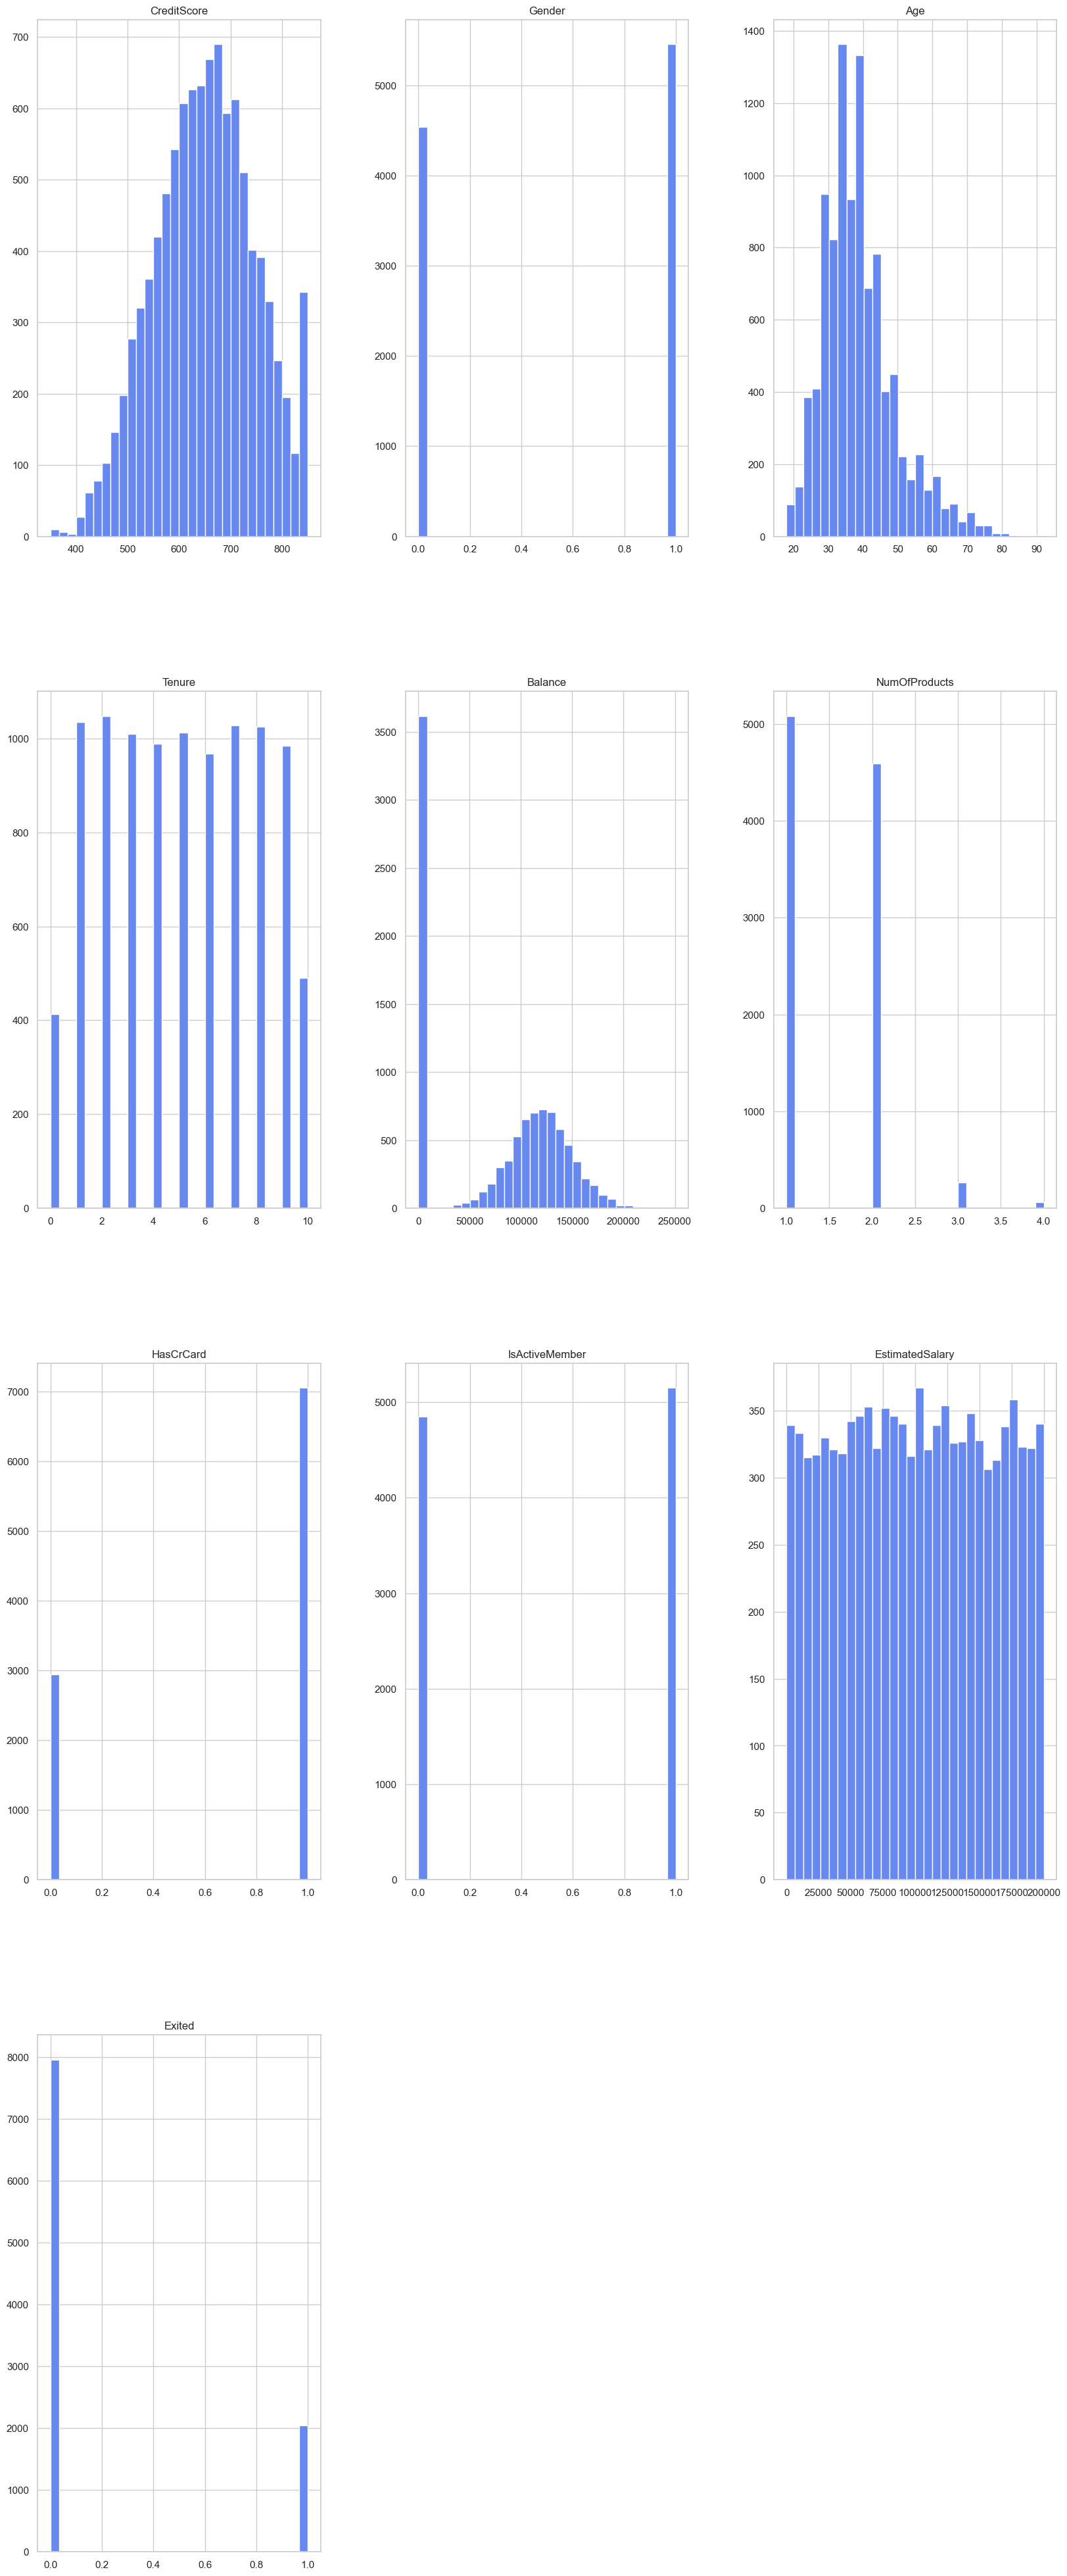

In [ ]:
#plot histogram
data.hist(bins=30, figsize=(20,50))


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed

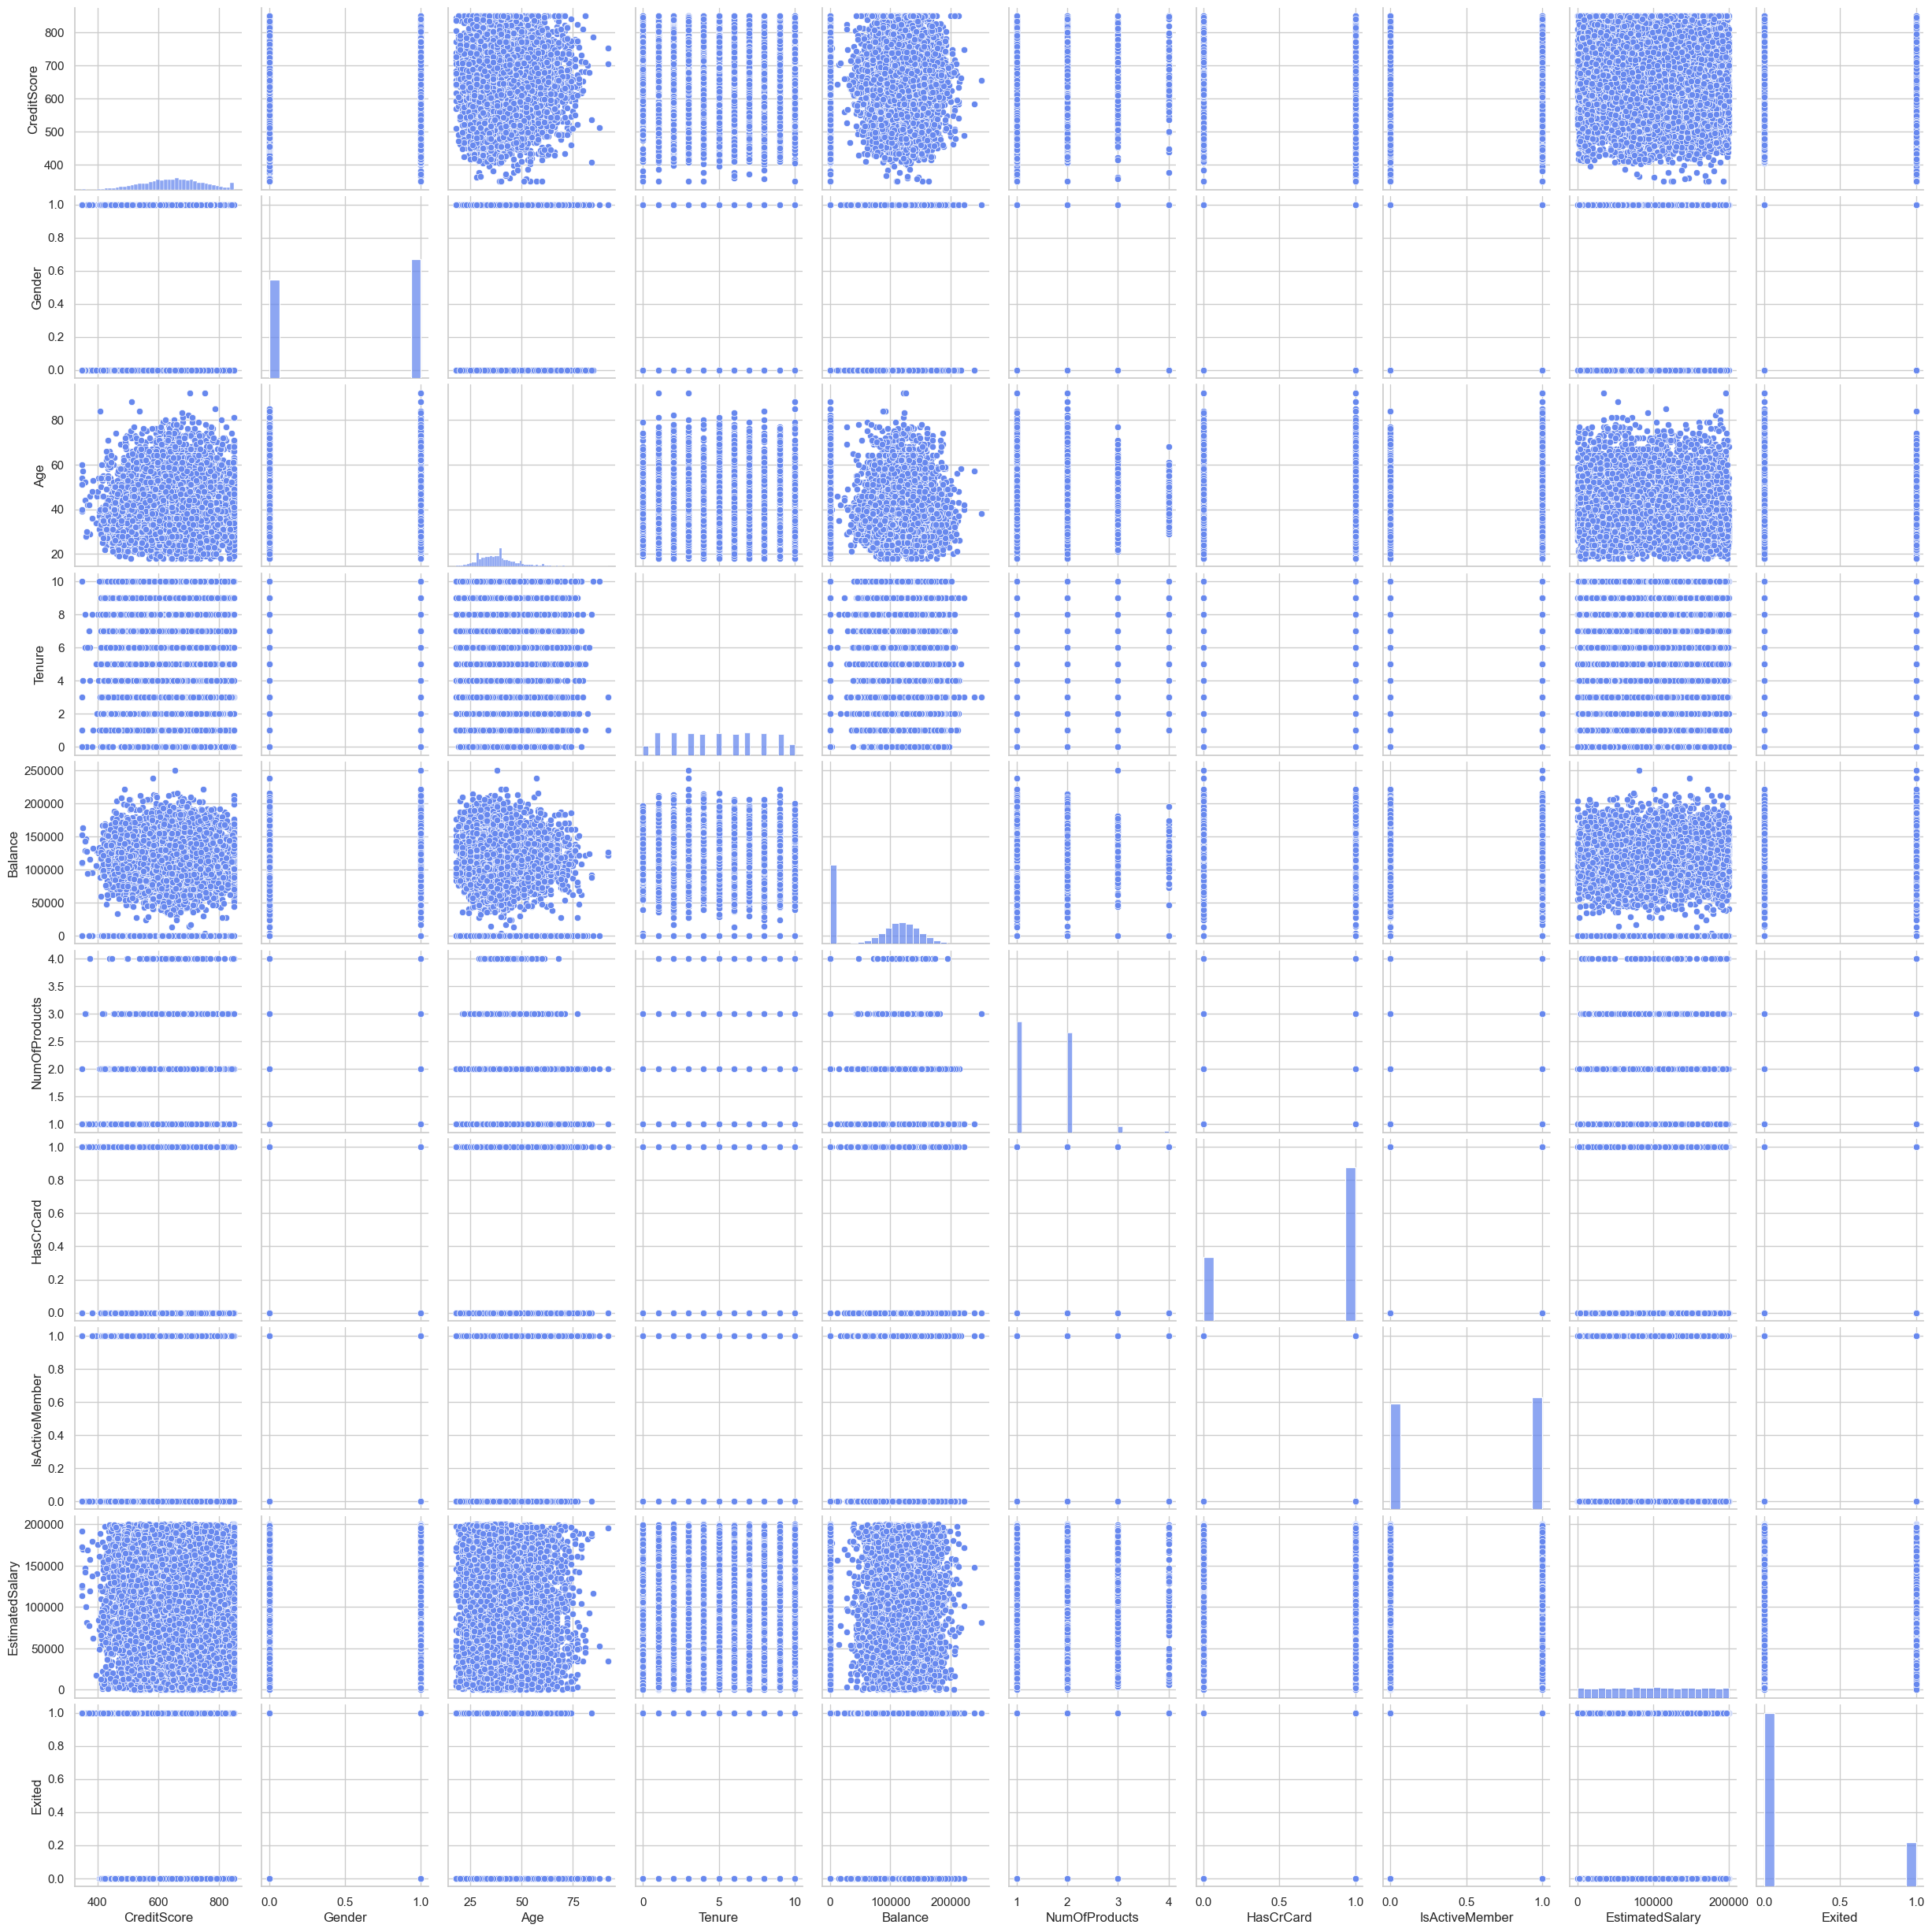

In [ ]:
#pairplot
sns.pairplot(data)

Modelling

Logistic Regression

In [ ]:
#Import Libraries
from sklearn .model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report


In [ ]:
#Assign variable
X=data.drop(['Exited'], axis=1)
y=data['Exited']

In [ ]:
#Train and Test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
#train logistic Regression Classifier
model_log = LogisticRegression()
model_log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#prediction
y_pred_log = model_log.predict(X_test)

In [ ]:
#Evaluation
accuracy_log = accuracy_score(y_test, y_pred_log)
report_log= classification_report(y_test, y_pred_log)

In [ ]:
#Results
print("Accuracy:",accuracy_log)
print("Classification Report:\n",report_log)

Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      2003
           1       0.48      0.08      0.14       497

    accuracy                           0.80      2500
   macro avg       0.65      0.53      0.52      2500
weighted avg       0.75      0.80      0.74      2500



Random Forest

In [ ]:
#import Library
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#Train RandomForestClasifier
classifier_RFC = RandomForestClassifier()
classifier_RFC.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#Prediction
y_pred_RFC = classifier_RFC.predict(X_test)

In [ ]:
#Evaluation
accuarcy_RFC = accuracy_score(y_test,y_pred_RFC)
report_RFC= classification_report(y_test,y_pred_RFC)

In [ ]:
#Outcomes
print("Accuracy:",accuarcy_RFC)
print("classification report:\n",report_RFC)

Accuracy: 0.8548
classification report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      2003
           1       0.74      0.42      0.54       497

    accuracy                           0.85      2500
   macro avg       0.80      0.69      0.72      2500
weighted avg       0.84      0.85      0.84      2500



Gradient Bossting(XGBoost)

In [ ]:
#import library
from xgboost import XGBClassifier

In [ ]:
#Train XGBoost Classifier
classifier_XGB = XGBClassifier()
classifier_XGB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Prediction
y_pred_XGB = classifier_XGB.predict(X_test)

In [ ]:
#Evaluation
accuracy_XGB = accuracy_score(y_test,y_pred_XGB)
report_XGB = classification_report(y_test,y_pred_XGB)

In [ ]:
#Result
print("Accuracy:",accuracy_XGB)
print("Classification Report:\n",report_XGB)

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      2003
           1       0.68      0.46      0.55       497

    accuracy                           0.85      2500
   macro avg       0.78      0.70      0.73      2500
weighted avg       0.84      0.85      0.84      2500

